In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# load image and convert to 2d-np array
image_path = 'image.jpg'
img = Image.open(image_path).convert('L')
X = np.array(img, dtype=np.float64)

In [39]:
# set the height and width of the image array
H, W = X.shape

In [40]:
# Calculate X meaned(Xi,j - mean(Xi))
X_mean = np.mean(X, axis=0)
X_meaned = X - X_mean

In [41]:
# Calculate the covariance matrix
cov_matrix = np.dot(X_meaned.T, X_meaned) / (H - 1)

In [42]:
# Calculate eigen values and vectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

In [8]:
# Sort eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigen_value = eigen_values[sorted_index]
sorted_eigen_vectors = eigen_vectors[:,sorted_index]

In [36]:
"""
Compression and Decompression
"""

components = 50
principal_components = sorted_eigen_vectors[:,:components]

# Compress the image
X_projected = np.dot(X_meaned, principal_components)

# Decompress the image and ensure values are within valid range
X_reconstructed = np.dot(X_projected, principal_components.T) + X_mean
X_reconstructed = np.clip(X_reconstructed, 0, 255)

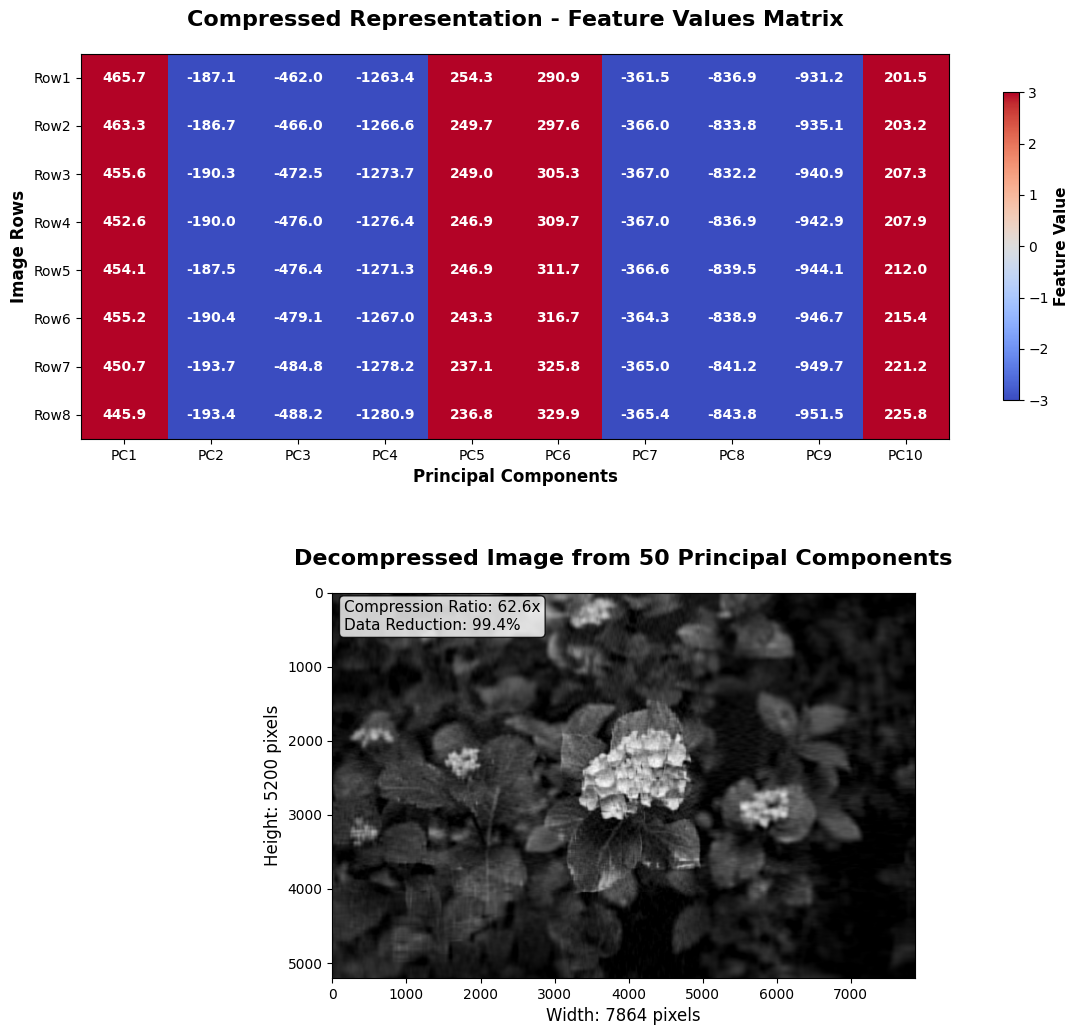

In [37]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# 1. COMPRESSED DATA MATRIX (Top window)
display_rows = min(8, H)
display_cols = min(10, components)
compressed_subset = X_projected[:display_rows, :display_cols]

im = ax1.imshow(compressed_subset, cmap='coolwarm', aspect='auto', vmin=-3, vmax=3)
ax1.set_title('Compressed Representation - Feature Values Matrix',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Principal Components', fontsize=12, fontweight='bold')
ax1.set_ylabel('Image Rows', fontsize=12, fontweight='bold')

ax1.set_xticks(range(display_cols))
ax1.set_yticks(range(display_rows))
ax1.set_xticklabels([f'PC{i+1}' for i in range(display_cols)])
ax1.set_yticklabels([f'Row{i+1}' for i in range(display_rows)])

for i in range(display_rows):
    for j in range(display_cols):
        text = ax1.text(j, i, f'{compressed_subset[i, j]:.1f}',
                       ha="center", va="center",
                       color="white" if abs(compressed_subset[i, j]) > 1.5 else "black",
                       fontsize=10, fontweight='bold')

cbar = plt.colorbar(im, ax=ax1, shrink=0.8)
cbar.set_label('Feature Value', fontsize=11, fontweight='bold')

# 2. DECOMPRESSED IMAGE (Bottom window)
ax2.imshow(X_reconstructed, cmap='gray')
ax2.set_title(f'Decompressed Image from {components} Principal Components',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel(f'Width: {W} pixels', fontsize=12)
ax2.set_ylabel(f'Height: {H} pixels', fontsize=12)
ax2.axis('on')

compression_info = f'Compression Ratio: {(H*W)/(H*components + W*components):.1f}x\n'
compression_info += f'Data Reduction: {((W-components)/W)*100:.1f}%'

ax2.text(0.02, 0.98, compression_info, transform=ax2.transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# INCREASE SPACE BETWEEN THE TWO WINDOWS
plt.subplots_adjust(hspace=0.4)  # Increase this value for more space

plt.show()